# Random data

In [188]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

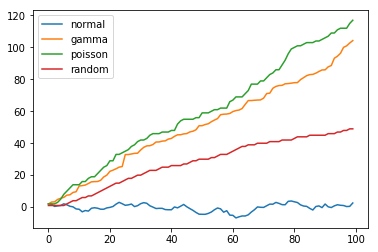

In [200]:
s = 100
df = pd.DataFrame({'normal': np.random.normal(size=s), 
                    'gamma': np.random.gamma(1, size=s), 
                    'poisson': np.random.poisson(size=s),
                    'random': np.random.randint(2, size=s)
                  })
df.cumsum(0).plot()

In [190]:
for col in df.columns:
    df[col] = df[col].clip(lower=0)

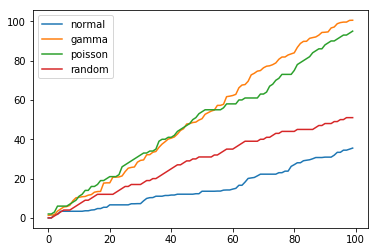

In [191]:
df.cumsum(0).plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a181517f0>,
      dtype=object)

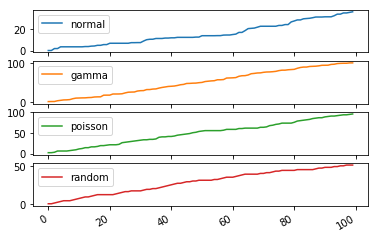

In [192]:
df.cumsum(0).plot(subplots=True)

In [193]:
df = df.unstack().reset_index() 

In [194]:
df = df.rename(columns={'level_0': 'type', 'level_1': 'date', 0: 'value'})
df.head()

,type,date,value
0,normal,0,0.000000
1,normal,1,0.000000
2,normal,2,1.785231
3,normal,3,0.000000
4,normal,4,1.599446


In [195]:
df['cumul'] = df.groupby(['type'])['value'].cumsum()

In [197]:
df.head()

,type,date,value,cumul
0,normal,0,0.000000,0.000000
1,normal,1,0.000000,0.000000
2,normal,2,1.785231,1.785231
3,normal,3,0.000000,1.785231
4,normal,4,1.599446,3.384677


In [198]:
df.index.names = ['id']
df.to_csv("random-data.csv", sep=',', encoding='utf-8', index=True)